In [6]:
from typing import TypedDict
from langgraph.graph import StateGraph, START, END

In [8]:
class AgentState(TypedDict):
    number1: int
    number2: int
    operation1: str
    number3: int
    number4: int
    operation2: str
    result1: int
    result2: int

def adder1(state: AgentState) -> AgentState:
    """Adds two numbers."""
    state['result1'] = state['number1'] + state['number2']
    return state

def subtractor1(state: AgentState) -> AgentState:
    """Subtracts two numbers."""
    state['result1'] = state['number1'] - state['number2']
    return state

def router1(state: AgentState) -> AgentState:
    """Routes the state to the appropriate operation."""
    if state['operation1'] == '+':
        return "addition_operation"
    elif state['operation1'] == '-':
        return "subtraction_operation"

def adder2(state: AgentState) -> AgentState:
    """Adds two numbers."""
    state['result2'] = state['number3'] + state['number4']
    return state

def subtractor2(state: AgentState) -> AgentState:
    """Subtracts two numbers."""
    state['result2'] = state['number3'] - state['number4']
    return state

def router2(state: AgentState) -> AgentState:
    """Routes the state to the appropriate operation."""
    if state['operation2'] == '+':
        return "addition_operation2"
    elif state['operation2'] == '-':
        return "subtraction_operation2"


In [9]:
graph = StateGraph(AgentState)

graph.add_node("add_node1", adder1)
graph.add_node("sub_node1", subtractor1)
graph.add_node("router_node1", lambda state: state)
graph.add_node("add_node2", adder2)
graph.add_node("sub_node2", subtractor2)
graph.add_node("router_node2", lambda state: state)

graph.add_edge(START, "router_node1")

graph.add_conditional_edges("router_node1", router1, {
    "addition_operation": "add_node1",
    "subtraction_operation": "sub_node1"
})

graph.add_edge("add_node1", "router_node2")
graph.add_edge("sub_node1", "router_node2")

graph.add_conditional_edges("router_node2", router2, {
    "addition_operation2": "add_node2",
    "subtraction_operation2": "sub_node2"
})

graph.add_edge("add_node2", END)
graph.add_edge("sub_node2", END)

app = graph.compile()


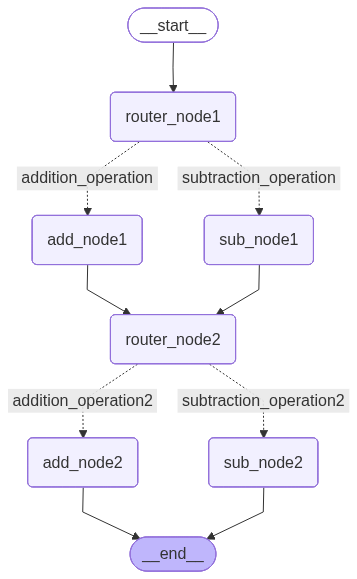

In [10]:
from IPython.display import Image,display

display(Image(app.get_graph().draw_mermaid_png()))


In [13]:
initial_state = AgentState(number1 = 10, operation1="-", number2 = 5, number3 = 7, number4=2, operation2="+", result1= 0, result2 = 0)


In [ ]:
print(app.invoke(initial_state))



{'number1': 10, 'number2': 5, 'operation1': '-', 'number3': 7, 'number4': 2, 'operation2': '+', 'result1': 5, 'result2': 9}
